In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 

In [13]:
# Reading captured oscilloscope data 
df_p = pd.read_csv('./LR1/p-half.csv')
df_s = pd.read_csv('./LR1/s-half.csv')

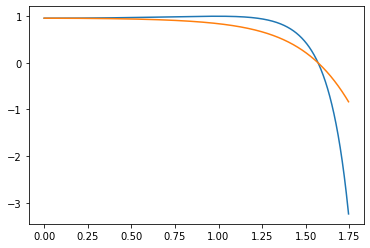

,rad,t_p,T_p
0,0.000000,0.794660,0.957835
1,0.000035,0.794660,0.957835
2,0.000070,0.794660,0.957835
3,0.000105,0.794660,0.957835
4,0.000140,0.794660,0.957835
...,...,...,...
49995,1.745155,-0.697511,-3.235304
49996,1.745190,-0.697718,-3.236593
49997,1.745225,-0.697925,-3.237884
49998,1.745259,-0.698131,-3.239174


In [60]:
# THEORETICAL WORK

# Declaring constants
n_i = 1 
n_t = 1.5168 # Noted to be glass Bk-7 
a_spd = 10 # deg/s 
conversion = np.pi/180 # conversion constant from deg to rad 
a_spd2 = a_spd*conversion # rad/s

# Creating new columns in dataframe 
df_s['rad'] = df_s[df_s.columns[0]]*a_spd2
df_s['theta_i'] = df_s['rad']
df_s['theta_t'] = np.arcsin((n_i/n_t)*np.sin(df_s['theta_i'])) # Using snell's law to calculate for transmission angle
thetaS_i = df_s['theta_i']
thetaS_t = df_s['theta_t']

df_p['rad'] = df_p[df_p.columns[0]]*a_spd2 
df_p['theta_i'] = df_p['rad']
df_p['theta_t'] = np.arcsin((n_i/n_t)*np.sin(df_p['theta_i'])) # Using snell's law to calculate for transmission angle 
thetaP_i = df_p['theta_i']
thetaP_t = df_p['theta_t']

# Creating new dataframe to store columns for theoretical values 
df_theoryS = pd.DataFrame() 
df_theoryP = pd.DataFrame() 

df_theoryS['rad'] = df_s['rad']
df_theoryP['rad'] = df_p['rad']

# For s-polarized 
df_theoryS['t_s'] = (2*n_i*np.cos(thetaS_i))/(n_i*np.cos(thetaS_i) + n_t*np.cos(thetaS_t))
df_theoryS['T_s'] = ((n_t*np.cos(thetaS_t))/(n_i*np.cos(thetaS_i))) * df_theoryS['t_s']**2 

# For p-polarized 
df_theoryP['t_p'] = (2*n_i*np.cos(thetaP_i))/(n_i*np.cos(thetaP_t) + n_t*np.cos(thetaP_i))
df_theoryP['T_p'] = ((n_t*np.cos(thetaP_t))/(n_i*np.cos(thetaP_i))) * df_theoryP['t_p']**2

plt.plot(df_theoryP['rad'], df_theoryP['T_p'])
plt.plot(df_theoryS['rad'], df_theoryS['T_s'])
plt.show()

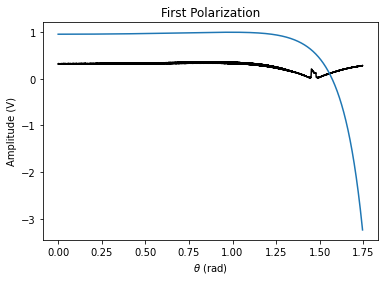

In [57]:
# For p-polarized
plt.plot(df_p[df_p.columns[2]], df_p[df_p.columns[1]], color = 'black') 
plt.plot(df_theoryP['rad'], df_theoryP['T_p'])
plt.title('First Polarization')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Amplitude (V)')
plt.show()

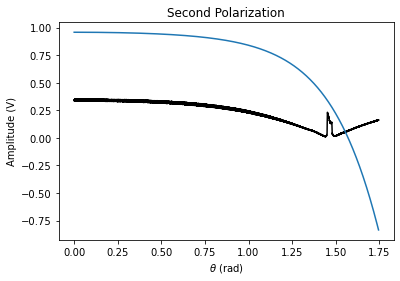

In [56]:
# For s-polarized
plt.plot(df_s[df_s.columns[2]], df_s[df_s.columns[1]], color = 'black')
plt.plot(df_theoryS['rad'], df_theoryS['T_s'])
plt.title('Second Polarization')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Amplitude (V)')
plt.show()